<a href="https://colab.research.google.com/github/Sonu2252/Computer_Vision/blob/main/Anomaly_Detection_CNN_Malarial_Parasite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from numpy import unique, argmax

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
IMG_SIZE = 64
batch_size = 128

In [ ]:
import cv2
import os

In [ ]:
!unzip "/content/gdrive/MyDrive/train.zip" 

Archive:  /content/gdrive/MyDrive/train.zip
replace train/Parasitized/C80P41ThinF_IMG_20150817_111246_cell_113.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls train

Parasitized  Uninfected


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'train'.
There are 0 directories and 12454 images in 'train/Uninfected'.
There are 0 directories and 12546 images in 'train/Parasitized'.


In [ ]:
import pathlib
data_dir = pathlib.Path("train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Parasitized' 'Uninfected']


In [ ]:
from pylab import *
import random
import matplotlib.image as mpimg

In [ ]:
def image(directory, class_name):
  folder = directory +"/"+ class_name
  random_image = random.sample(os.listdir(folder), 1)
  img = mpimg.imread(folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (106, 97, 3)


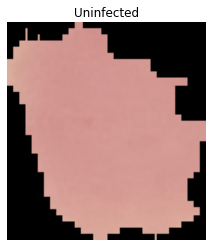

In [ ]:
img = image(directory="train", class_name="Uninfected")

In [ ]:
import matplotlib.image as mpimg
import random
import cv2
import os

In [ ]:
class_names = list(class_names)

In [ ]:
data = []
for category in class_names:
    folder = os.path.join(data_dir, category)
    label = class_names.index(category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder, image)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])


In [ ]:
len(data)

25000

In [ ]:
from random import shuffle

In [ ]:
random.shuffle(data)


In [ ]:
X= []
y=[]

for features, labels in data:
  X.append(features)
  y.append(labels)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
from pylab import *

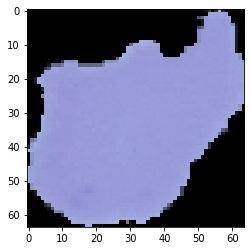

In [ ]:
imshow(X[0])

In [ ]:
X = X.astype('float32')
X = X/255.0

In [ ]:
X[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

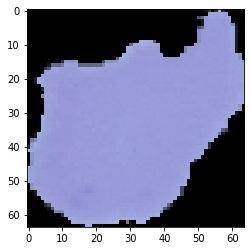

In [ ]:
imshow(X[0])

In [ ]:
len(y)

25000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

20000

In [ ]:
len(X_test)

5000

In [ ]:
len(y_train)

20000

In [ ]:
y_train[0]

1

In [ ]:
X_train.shape

(20000, 64, 64, 3)

In [ ]:
X_shape = X_train.shape[1:]

In [ ]:
X_shape

(64, 64, 3)

In [ ]:
def get_images(dir, samples):
  training_images_path = []
  for cell_type in class_names:
    path = os.path.join(data_dir, cell_type)
    i = 0
    for img in os.listdir(path):
      i = i+1
      if i > samples:
        break
      else:
        training_images_path.append(os.path.join(path, img))
    return training_images_path

In [ ]:
def visualize_cells(images_path, rows, cols):
  fig = plt.figure(figsize = (20, 20))
  for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    img_array = cv2.imread(images_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.xlabel(images_path[i-1].split('/')[-2])
  plt.show()

In [ ]:
train_path = get_images(data_dir, 20)

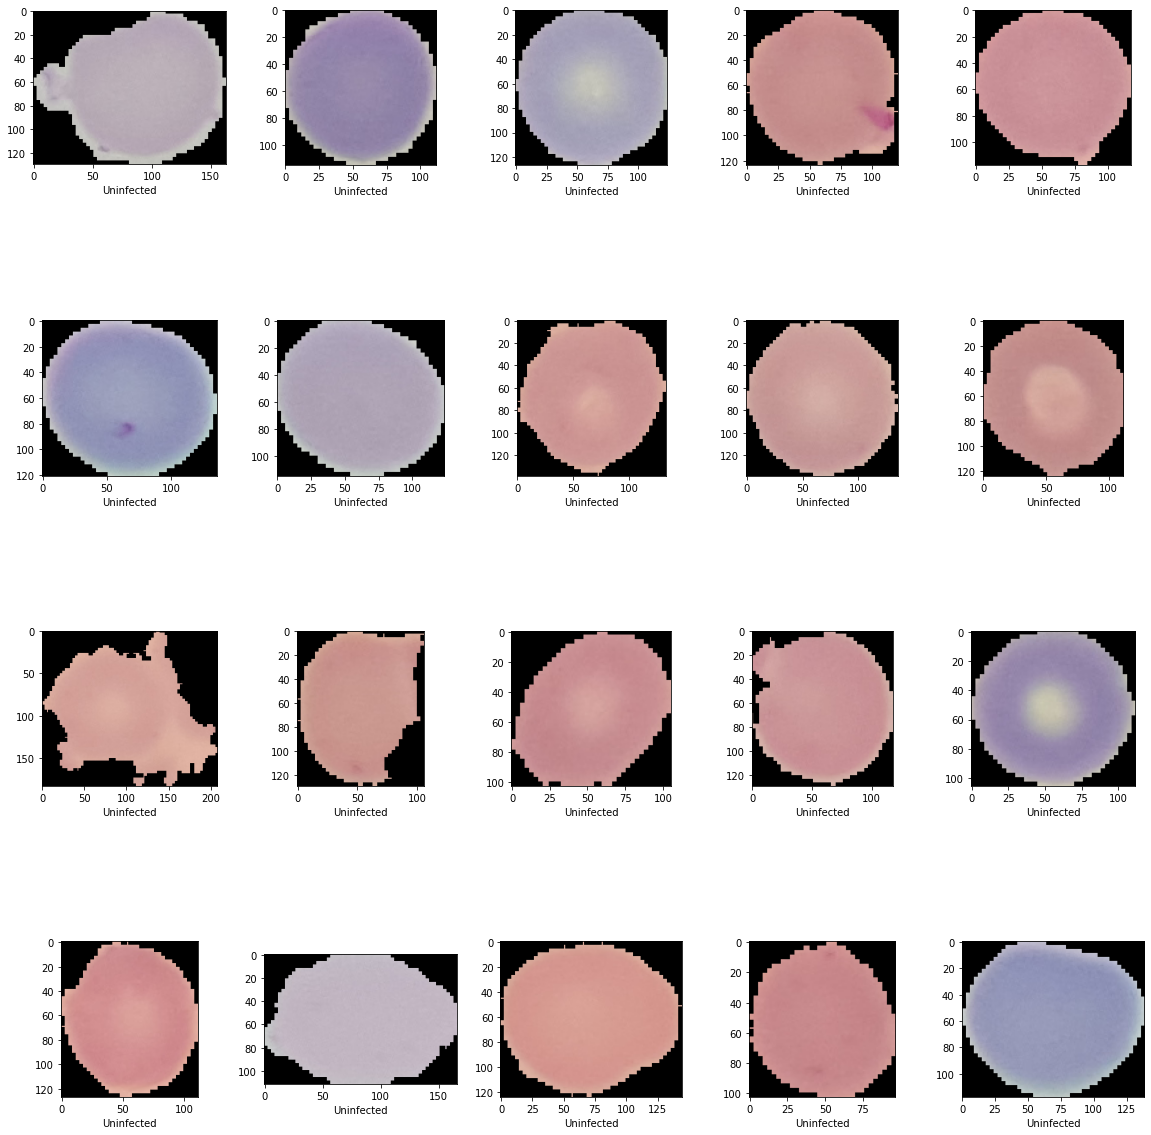

In [ ]:
visualize_cells(train_path, 4, 5)

In [ ]:
model_1 = Sequential([
            Conv2D(32, (3, 3), activation="relu", input_shape = X_shape),
            MaxPooling2D((2, 2)),
            Conv2D(48, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Dropout(0.5),
            Flatten(),
            Dense(100, activation="relu"),
            Dense(1, activation="sigmoid")
])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 48)        13872     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 48)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9408)             

In [ ]:
from tensorflow.keras.utils import plot_model


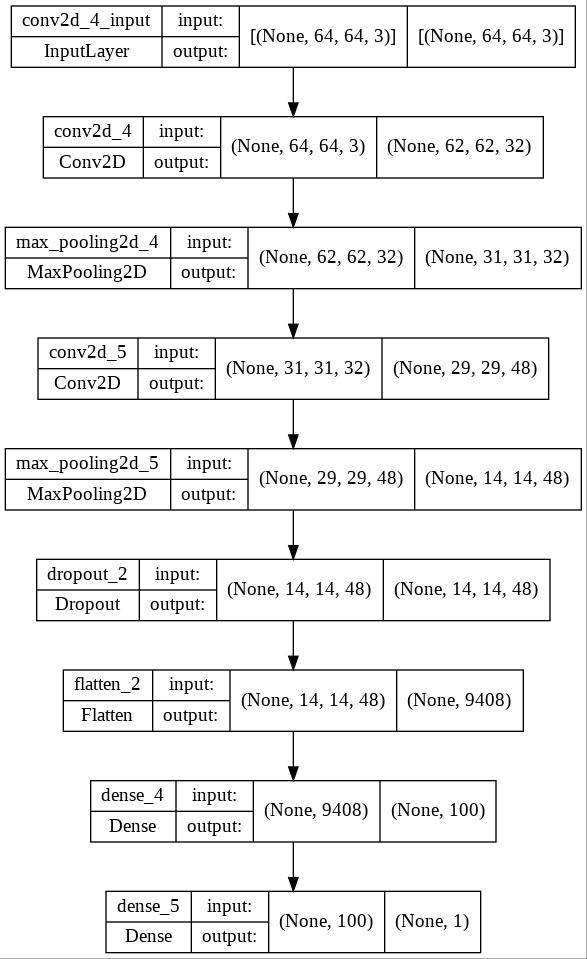

In [ ]:
plot_model(model_1, 'model_1.jpg', show_shapes=True)

In [ ]:
model_1.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5495 - accuracy: 0.7136 - val_loss: 0.2727 - val_accuracy: 0.9038
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2270 - accuracy: 0.9187 - val_loss: 0.1873 - val_accuracy: 0.9340
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1911 - accuracy: 0.9352 - val_loss: 0.1589 - val_accuracy: 0.9460
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1697 - accuracy: 0.9439 - val_loss: 0.1654 - val_accuracy: 0.9508
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1524 - accuracy: 0.9502 - val_loss: 0.1383 - val_accuracy: 0.9588
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1390 - accuracy: 0.9552 - val_loss: 0.1374 - val_accuracy: 0.9552
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1351 - accuracy: 0.9555 - val_loss: 0.1404 - val_accuracy: 0.9530
Epoch 

In [ ]:
loss, accuracy = model_1.evaluate(X_test, y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.1402 - accuracy: 0.9552


In [ ]:
print(f"Accuracy of the model is: {accuracy*100} %.")

Accuracy of the model is: 95.52000164985657 %.


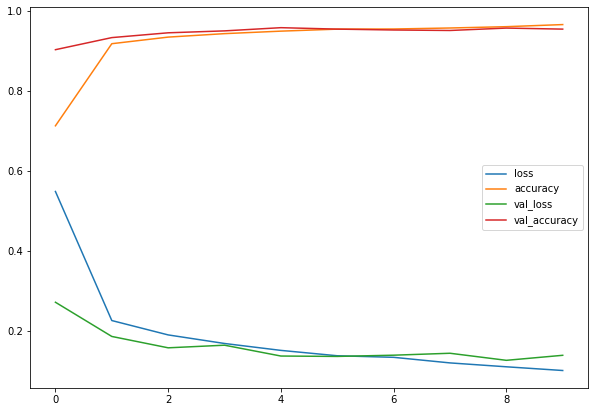

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [ ]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

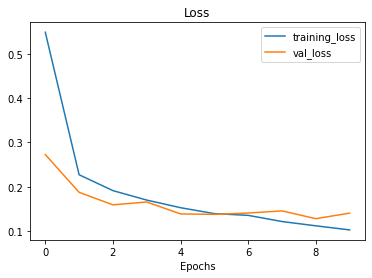

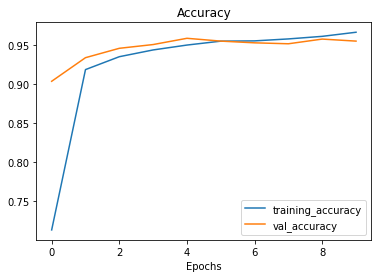

In [ ]:
plot_loss_curve(history_1)

In [ ]:
!unzip /content/gdrive/MyDrive/test.zip

Archive:  /content/gdrive/MyDrive/test.zip
replace test/test1/C48P9thinF_IMG_20150721_161055_cell_187.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls test

test1


In [ ]:

data_dir = pathlib.Path("/content/test/test1/")

In [ ]:
data1 = []
for image in os.listdir(data_dir):
  image_path = os.path.join(data_dir, image)
  img_arr = cv2.imread(image_path)
  img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
  data1.append([img_arr])

In [ ]:
len(data1)

2558

In [ ]:
X_valid = []
for features in data1:
  X_valid.append(features)

In [ ]:
X_valid = np.array(X_valid)

In [ ]:
X_valid.shape

(2558, 1, 64, 64, 3)

In [ ]:
X_valid[5].shape

(1, 64, 64, 3)

In [ ]:
image = X_valid[5]

In [ ]:
image = image.reshape(64, 64, 3)

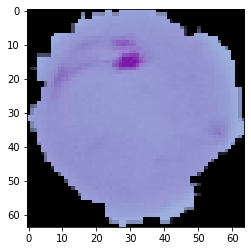

In [ ]:
imshow(image)

In [ ]:
image = image.reshape(1, 64, 64, 3)

In [ ]:
predicted = model_1.predict([image])
p = argmax(predicted)
print('Predicted: {}'.format(argmax(predicted)))

Predicted: 0


In [ ]:
print(f"The malarial infection shown in the picture is:", class_names[p])

The malarial infection shown in the picture is: Parasitized


In [ ]:
def rand_examp(x, y):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)
  x = x[indices]
  y = y[indices]

  plt.figure(figsize=(10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(y[i])])
  plt.show()
  



In [ ]:
X_valid = X_valid.reshape(2558, 64, 64, 3)

In [ ]:
predicted = model_1.predict(X_valid)

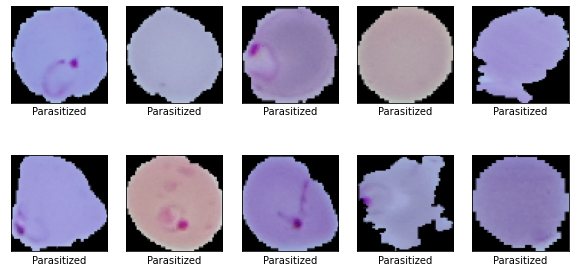

In [ ]:
rand_examp(X_valid, predicted)